<div style="font-size: 14;color:red;font-size:25PX;font-family: arial;" align ="rigth" dir="rtl">
<b>
1- فراخوان توابع مورد نیاز
</b>
</div>

In [19]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.gridspec import GridSpec
import seaborn as sns
import cv2 
#working_dir = os.getcwd()
working_dir ='..'  # Use on Jupyter Notebook

<div style="font-size: 14;color:red;font-size:25PX;font-family: arial;" align ="rigth" dir="rtl">
<b>
2- خواندن تصویر و تبدیل به سیاه و سفید
</b>
</div>

In [4]:
img = cv2.imread(f"{working_dir}/opencv-images/isotermal-b3-1_5.jpg", cv2.IMREAD_GRAYSCALE)
(thresh, im_bw) = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

<div style="font-size: 14;color:red;font-size:25PX;font-family: arial;" align ="rigth" dir="rtl">
<b>
3- تبدیل اطلاعات تصویر به دیتافریم
</b>
</div>

In [ ]:
dic = {}
for i in range(522):
    dic[i] = im_bw[:,i]
df = pd.DataFrame(dic)
#----------------- Remove the first 7 rows and the last 6 rows -----------------
df.drop(index=[0,1,2,3,4,5,6,329,330,331,332,333,334],inplace=True)
#----------------- Remove the first 12 columns and the last 12 columns -----------------
df.drop(columns=[0,1,2,3,4,5,6,7,8,9,10,11,514,515,516,517,518,519,520,521],inplace=True)
df.reset_index(drop=True,inplace=True)
df.columns = range(df.shape[1])
print(df.shape)
df.to_csv(f"{working_dir}/opencv-images/1.csv", index=True,header=True)
del df

(322, 502)


<div style="font-size: 14;color:red;font-size:25PX;font-family: arial;" align ="rigth" dir="rtl">
<b>
4- تبدیل اطلاعات تصویر بصورت x و y و label
</b>
</div>

(322, 502)


/tmp/ipykernel_3864/32716549.py:32: UserWarning: The palette list has more values (10) than needed (1), which may not be intended.
  sns.scatterplot(


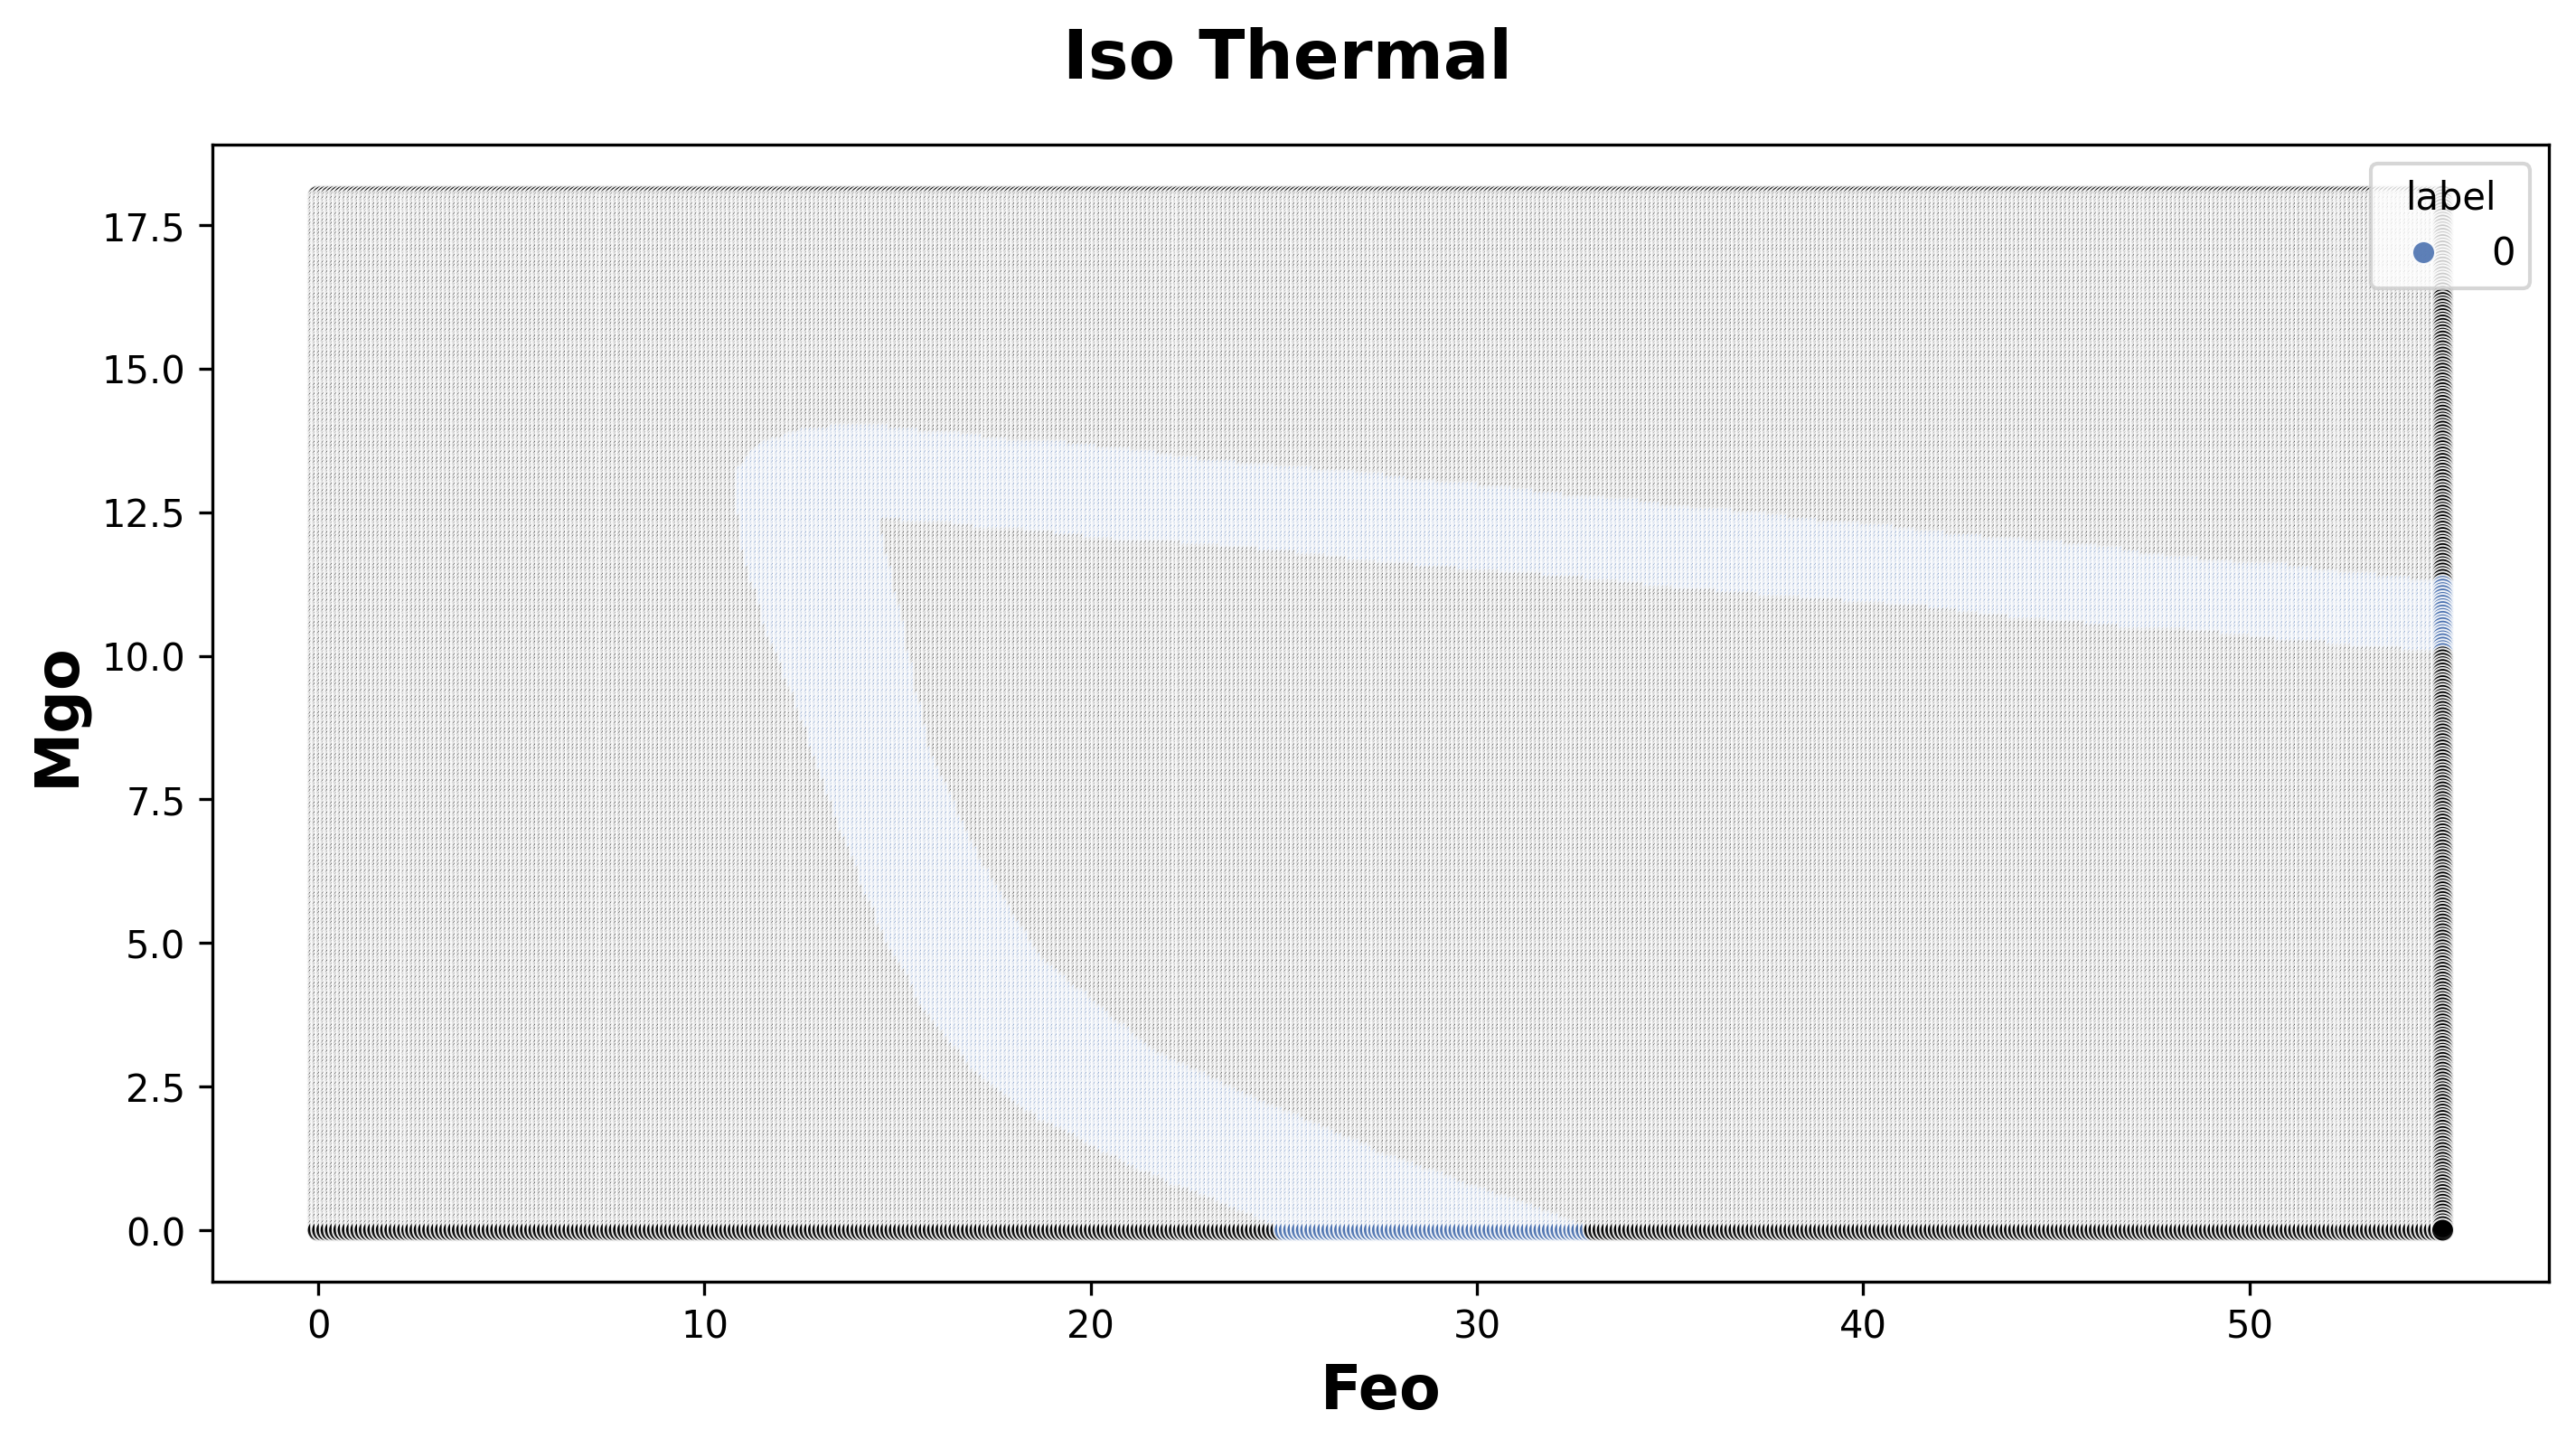

In [26]:
df = pd.read_csv(f"{working_dir}/opencv-images/1.csv",index_col=0)
print(df.shape)

dic_xscale =dict(zip(range(0,df.shape[1]),np.linspace(start=0,stop=55,num=df.shape[1]).round(2)))
dic_yscale =dict(zip(range(0,df.shape[0]),np.linspace(start=18,stop=0,num=df.shape[0]).round(2)))
dicxy = {}
xlist = []
ylist = []
label = []
for i in range(df.shape[1]):
    for j in range(df.shape[0]):
        if df.iloc[j,i]== 255:
            xlist.append(dic_xscale[i])
            ylist.append(dic_yscale[j])
            label.append(1)
        if df.iloc[j,i]== 0:
            xlist.append(dic_xscale[i])
            ylist.append(dic_yscale[j])
            label.append(0)
dicxy['x'] = xlist
dicxy['y'] = ylist
dicxy['label'] = label
xydf = pd.DataFrame(dicxy)
#------------------- Plotting the image -------------------
fig = plt.figure(figsize=(9.6,5.4),dpi=300)
fig.suptitle('Iso Thermal', fontsize=18,fontweight='bold')
ax1 = fig.subplots(1,1)
ax1.set_xlabel('Feo', fontsize=16,fontweight='bold')
ax1.set_ylabel('Mgo', fontsize=16,fontweight='bold')
#ax1.xaxis.set_major_locator(ticker.MultipleLocator(0.01))
cmap = sns.color_palette("deep", as_cmap=True)
sns.scatterplot(
    data=xydf,
    x='x',
    y='y',
    hue='label',
    hue_order=[0],
    palette= cmap,
    alpha=0.9,
    markers='.',
    )
fig.tight_layout()
#plt.savefig(f'{working_dir}/presentation/coke-1030-tsne-clusters.jpg')
plt.show()



xydf.to_csv(f"{working_dir}/opencv-images/1xy.csv", index=True,header=True)
del xydf,df,dicxy